# Описание проекта
### Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Часть 1
## Задача
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [23]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
#from pandas.tseries import converter
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters

In [25]:
hypotheses = pd.read_csv('hypothesis.csv')
# Привдём названия столбцов к нижнему регистру:
hypotheses.columns = list(x.lower() for x in hypotheses.columns)
display(hypotheses)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [26]:
# Проверим типы данных:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [27]:
# Так как данные готовы без предобработки, то можем приступить к просмотру результатов.
# Добавим столбец для ICE score, который рассчитывается как impact * confidence / efforts:
hypotheses['ice_score'] = (hypotheses['impact'] * hypotheses['confidence'] / hypotheses['efforts']).round(1)
# Отсортируем данные по ICE score в порядке убывания:
hypotheses.sort_values(by='ice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


In [28]:
# Добавим столбец для RICE score, где в самое начало числителя добавляется reach:
hypotheses['rice_score'] = hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence'] / hypotheses['efforts']
hypotheses.sort_values(by='rice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


## Вывод
Согласно методу приоритизации гипотез ICE следует запустить акцию, дающую скидку в день рождения, однако, метод RICE, который учитывает количество затронутых пользователей указывает, что следует выбрать добавление форму подписки чтобы собрать базу клиентов для email-рассылок. Параметр reach увеличивает баллы ICE на порядок, поэтому балл и рейтинг этой гипотезы по RICE так сильно отрывается от конкурирующих.

<a name="header2"></a>
# Часть 2

<h3>Проанализируйте A/B-тест:</h3>
<ol>
    <li><input type="checkbox"> <a href="#1">Постройте график кумулятивной выручки по группам.</a> <a href="#1c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#2">Постройте график кумулятивного среднего чека по группам.</a> <a href="#2c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#3">Постройте график относительного изменения кумулятивного среднего чека группы B к группе A.</a> <a href="#3c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#4">Постройте график кумулятивной конверсии по группам.</a> <a href="#4c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#5">Постройте график относительного изменения кумулятивной конверсии группы B к группе A.</a> <a href="#5c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#6">Постройте точечный график количества заказов по пользователям.</a> <a href="#6c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#7">Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.</a> <a href="7c">Выберите границу для определения аномальных пользователей.</a></li>
    <li><input type="checkbox"> <a href="#8">Постройте точечный график стоимостей заказов.</a> <a href="#8c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#9">Посчитайте 95-й и 99-й перцентили стоимости заказов. </a> <a href="#9c">Выберите границу для определения аномальных заказов.</a></li>
    <li><input type="checkbox"> <a href="#10">Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.</a> <a href="#10c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#11">Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным.</a> <a href="#11c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#12">Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.</a> <a href="#12c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#13">Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.</a> <a href="#13c">Сделайте выводы и предположения.</a></li>
    <li><input type="checkbox"> <a href="#result">Примите решение по результатам теста и объясните его.</a>
    <br>Варианты решений:
        <ul>
            <li><input type="radio" checked> Остановить тест, зафиксировать победу одной из групп.</li>
            <li><input type="radio"> Остановить тест, зафиксировать отсутствие различий между группами. </li>
            <li><input type="radio"> Продолжить тест.</li>
        </ul>
    </li>
</ol>

---
<a name="1"></a>
## 1. График кумулятивной выручки по группам

In [30]:
orders = pd.read_csv('orders.csv')
display(orders.sort_values(by='revenue', ascending=False))

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
...,...,...,...,...,...
933,3760662696,3577713868,2019-08-27,60,B
459,863448794,2738601405,2019-08-19,50,B
756,125335873,3423937755,2019-08-30,50,B
584,1126146019,2705308997,2019-08-20,50,A


In [31]:
orders.to_csv('orders_for_ab_test.csv')

In [33]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [32]:
# Приведём столбец date к формату даты:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [34]:
visitors = pd.read_csv('visitors.csv')
display(visitors.sort_values(by='visitors', ascending=False))

,date,group,visitors
34,2019-08-04,B,770
43,2019-08-13,B,769
4,2019-08-05,A,756
12,2019-08-13,A,748
44,2019-08-14,B,746
...,...,...,...
9,2019-08-10,A,406
23,2019-08-24,A,395
54,2019-08-24,B,378
40,2019-08-10,B,369


In [35]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [36]:
# Приведём столбец date к формату даты:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [37]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [38]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [39]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [41]:
# Построим графики кумулятивной выручки по дням и группам A/B-тестирования:
# Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в обеих группах:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','revenue', 'orders']]

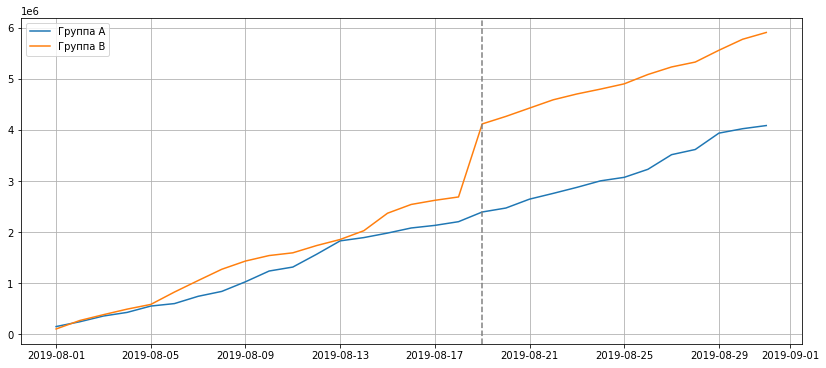

In [65]:
# Построим график выручки обеих групп:
plt.figure(figsize=[14, 6])
plt.grid(b=None, which='major', axis='both');
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Группа B')
plt.axvline(x = cumulativeRevenueA['date'][36], color='grey', linestyle='--')
plt.legend();

<a name="1c"></a>
<a href="#header2">Наверх</a>

## Вывод
1. Хотя в первые 5 дней графики идут вровень, после 5 августа кумулятивный график B явно показывает лучшие результаты, чем график варианта А; при этом они сходятся в накопленных суммах заказов с 1 по 5 число, а также 13 августа. Далее графики выравниваются и график варианта B уходит в отрыв.
2. Как видно из графика, 19 августа был сделан аномально большой заказ, который явно искажает картину для обработки данных.

По неочищенным данным можно сделать вывод, что вариант Б лучше варианта А, следовательно, следующим шагод нужно усечь выбросы (большие заказы) и снова сравнить графики.

---
<a href="#header2">Наверх</a>
<a name="2"></a>
## 2. График кумулятивного среднего чека

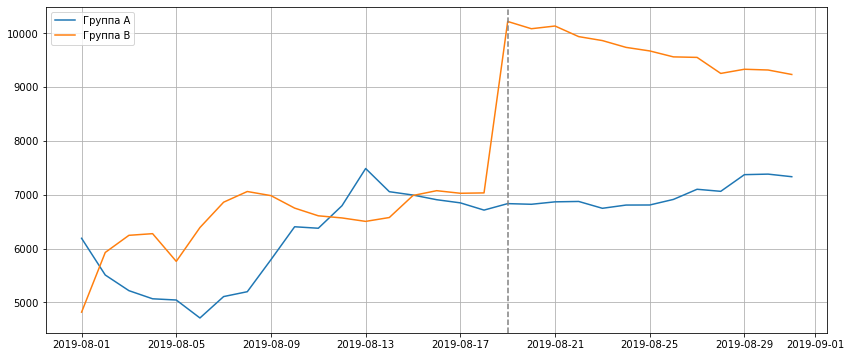

In [70]:
plt.figure(figsize=[14, 6])
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='Группа B')
plt.grid(which='major', axis='both')
plt.axvline(x = cumulativeRevenueA['date'][36], color='grey', linestyle='--')
plt.legend(loc=2);

<a href="#header2">Наверх</a>
## Вывод 
<a name="2c"></a>
<p>
    По графику среднего чека можно формально сказать, что по неочищенным данным средний чек в среднем выше, однако, более явно, что на средний чек группы B влияет выброс 19.08.17. Если "визуально" убрать его, представив смещенную линию ниже, то можно понять, что средний чек по графику B стабильно ниже варианта A.
</p>

---
<a href="#header2">Наверх</a>
<a name="3"></a>
## 3. График относительного изменения <br>кумулятивного среднего чека группы B к группе A

In [72]:
cumulativeRevenueA['date']

0    2019-08-01
2    2019-08-02
4    2019-08-03
6    2019-08-04
8    2019-08-05
10   2019-08-06
12   2019-08-07
14   2019-08-08
16   2019-08-09
18   2019-08-10
20   2019-08-11
22   2019-08-12
24   2019-08-13
26   2019-08-14
28   2019-08-15
30   2019-08-16
32   2019-08-17
34   2019-08-18
36   2019-08-19
38   2019-08-20
40   2019-08-21
42   2019-08-22
44   2019-08-23
46   2019-08-24
48   2019-08-25
50   2019-08-26
52   2019-08-27
54   2019-08-28
56   2019-08-29
58   2019-08-30
60   2019-08-31
Name: date, dtype: datetime64[ns]

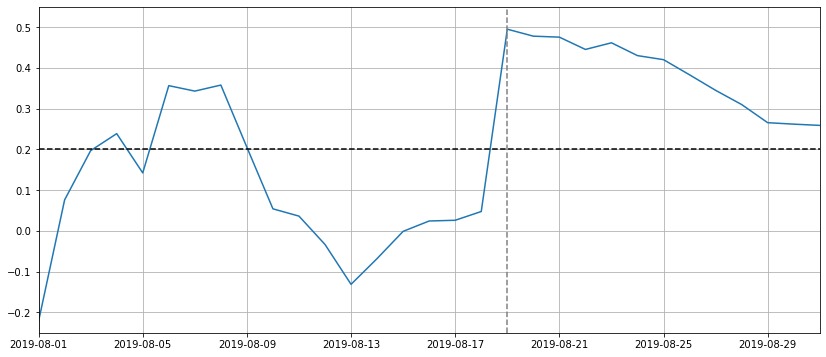

In [73]:
# Собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# Строим отношение средних чеков и зададим размер графика:
plt.figure(figsize=[14, 6])
plt.plot(
    mergedCumulativeRevenue['date'], 
        (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
        (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)

# Добавляем ось X
plt.axhline(y=0.2, color='black', linestyle='--')
plt.axvline(x = cumulativeRevenueA['date'][36], color='grey', linestyle='--')
plt.axis([cumulativeRevenueA['date'][0], cumulativeRevenueA['date'][60], -0.25, 0.55])
plt.grid(which='major', axis='both');

<a href="#header2">Наверх</a>
## 3. Вывод 
<a name="3c"></a>
<p>
    Из графика относительных изменений кумулятивного среднего чека варианта A к варианту B следует, что группа B не слишком стабильно, но показывает лучшие результаты относительно группы A. Однако, опять - это формальный вывод, на результаты которого сильно влияет вышеупомянутый выброс (отмечен серой линией на графике). В период стаблизации данных эксперимента мы видим, что кривая стремится вниз, ниже уровня превосходства над исходного варианта (A).
</p>

---
<a href="#header2">Наверх</a>
<a name="4"></a>
##  4. График кумулятивной конверсии по группам

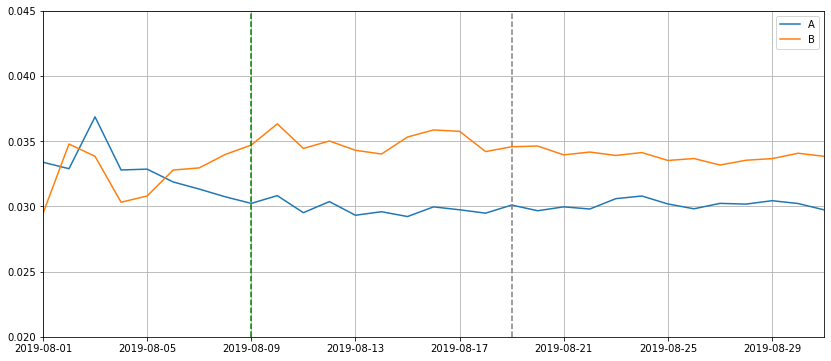

In [76]:
# Посчитаем кумулятивную конверсию:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группам A и B:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=[14, 6])
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis([cumulativeRevenueA['date'][0], cumulativeRevenueA['date'][60], 0.02, 0.045])
plt.grid(which='major', axis='both')
plt.axvline(x=cumulativeRevenueA['date'][16], color='green', linestyle='--')
plt.axvline(x=cumulativeRevenueA['date'][36], color='grey', linestyle='--')
plt.legend();

<a href="#header2">Наверх</a>
## 4. Вывод 
<a name="4c"></a>
<p>
    Примечательно, что графики после стабилизации (после зелёной линии, 2019-08-09) в пределах видимости коррелируют в конверсии - но явным лидером является график варианта B. Судя по конверсии, результаты группы B явно лучше, чем в исходном варианте.
    <br>А вот 19 августа с конверсией ничего примечательного не случилось.
</p>

---
<a href="#header2">Наверх</a>
<a name="5"></a>
##  5. График изменения относительной конверсии по группам

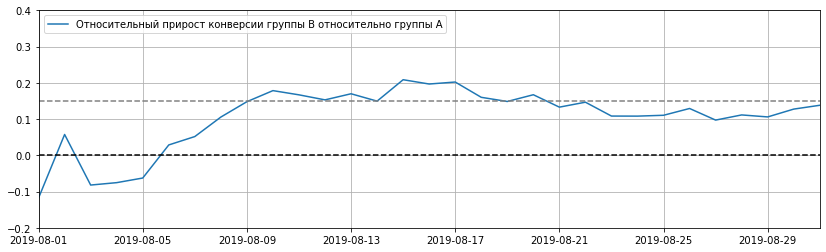

In [77]:
# Соберём датафрейм:
mergedCumulativeConversions = cumulativeDataA[
    ['date','conversion']].merge(
    cumulativeDataB[
        ['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Построим график:
plt.figure(figsize=[14, 4])
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")

plt.grid(which='major', axis='both')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([cumulativeRevenueA['date'][0], cumulativeRevenueA['date'][60], -0.2, 0.4])
plt.legend(loc=2);

<a href="#header2">Наверх</a>
## 5. Вывод 
<a name="5c"></a>
<p>
    Относительность этой метрики даёт достаточно хорошее предоставление о группе B: хотя средний чек и ниже, но выручка и конверсия заметно выше.
    <br>
    Далее следует посмотреть что скажет график по неочищенным данным.
</p>

---
<a href="#header2">Наверх</a>
<a name="6"></a>
##  6. Точечный график количества заказов на уникального пользователя

,user,num_of_orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


count    1031.00
mean     1.16   
std      0.72   
min      1.00   
25%      1.00   
50%      1.00   
75%      1.00   
max      11.00  
Name: num_of_orders, dtype: float64

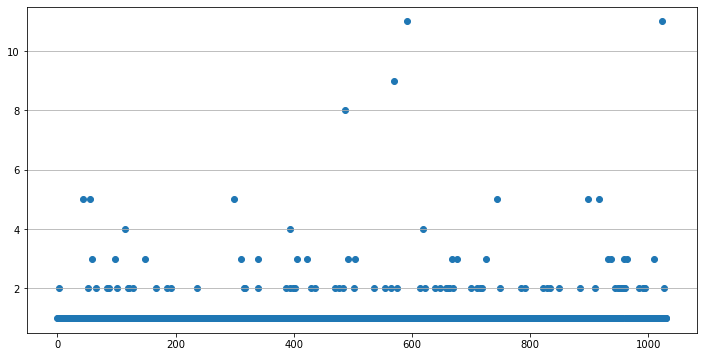

In [78]:
# Создадим нужный датафрейм и просуммируем количество заказов у сгруппированных пользователей:
ordersByUsers = orders[['visitorId', 'transactionId']].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['user','num_of_orders']
# Посмотрим на топ-10 пользователей с наибольшим количеством заказов, а также на описание данных по количеству заказов в целом:
display(ordersByUsers.sort_values(by='num_of_orders', ascending=False).head(15))
display(ordersByUsers['num_of_orders'].describe().round(2))
# Построим график рассеивания:
plt.figure(figsize=[12,6])
plt.grid(which='major', axis='y')
plt.scatter(pd.Series(range(0,len(ordersByUsers['num_of_orders']))), ordersByUsers['num_of_orders'])
plt.show()

<a href="#header2">Наверх</a>
<a name="6c"></a>
## 6. Вывод 
<p>
   Подавляющее количество пользователей делают 1 заказ, и лишь 10 пользователей сделали 5 и больше заказов. Скорее всего они попадут в то количество, что нужно отсеять для получения "чистых" данных. 
   <br> 
   Также нужно понять нет ли ошибки в заказах этих пользователей - вполне возможно, что это что-то заказанное по ошибке, например, нужна была 1 единица товара, пользвоатель заказал 10, а 9 вернул. В противном случае нужно приставить этим заказчикам личного менеджера и подарить им карту лояльности.
</p>

---
<a href="#header2">Наверх</a>
<a name="7"></a>
##  7. 95-й и 99-й перцентили количества заказов на пользователя

In [79]:
percetiles_list = [95, 99]
num_orders = np.percentile(ordersByUsers['num_of_orders'], percetiles_list)
num_orders = [int(x) for x in num_orders]
final_list = [(percetiles_list[i], num_orders[i]) for i in range(0, len(num_orders))]
display(f'Граница количество заказов на каждую перцентиль: {final_list}')

'Граница количество заказов на каждую перцентиль: [(95, 2), (99, 4)]'

<a href="#header2">Наверх</a>
<a name="7c"></a>
## 7. Вывод 
<p>
    Как и было видно из графика, выбросами являются все, кто заказал больше 2 или 4 заказов. Если выбрать границей 99 перцентиль, то будут отсечены те самые 10 заказчиков, однако из графика явно видно, что плотность падает не после 4-х заказов на пользователя, а после 2-х. Выберем границей 95-ю перцентиль чтобы быть более уверенными, что в выборке минимальное количество выбросов.
</p>

---
<a href="#header2">Наверх</a>
<a name="8"></a>
##  8. Точечный график стоимостей заказов

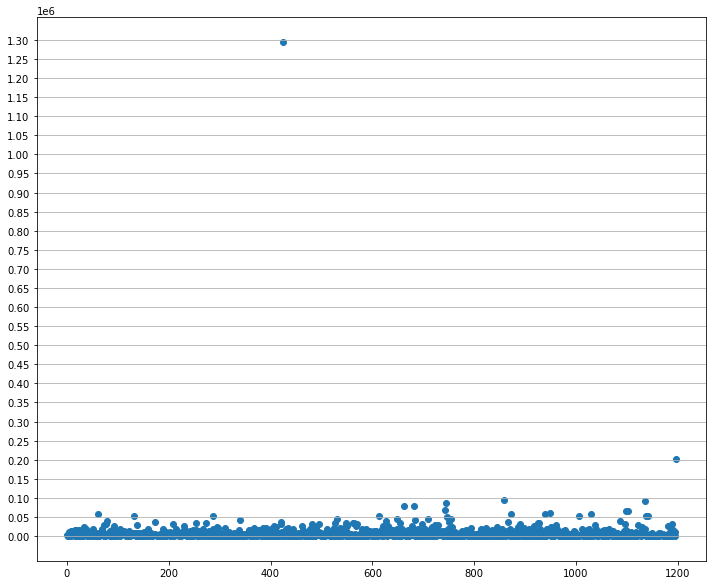

In [80]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=[12,10])
plt.grid(which='major', axis='y')
plt.yticks(np.arange(min([0]), max([1350000]), 50000.0))
plt.scatter(x_values, orders['revenue']);

<a href="#header2">Наверх</a>
<a name="8c"></a>
## 8. Вывод 
<p>
    По графику кажется, что в данных всего 2 выброса: 1 заказ на 1.3 млн и один заказ на 200 тыс. Избавившись от статистических выбросов после выбора границы отсечения по перцентилям мы получим более чёткую картину - вероятность таких заказов в будущем крайне мала, так как подавляющее большинство из них (исходя из графика) совершены на сумму менее 50 тысяч.
</p>

---
<a href="#header2">Наверх</a>
<a name="9"></a>
##  9. 95-й и 99-й перцентили стоимости заказов

In [81]:
percetiles_list = [95, 99]
num_orders = np.percentile(orders['revenue'], percetiles_list)
num_orders = [int(x) for x in num_orders]
final_list = [(percetiles_list[i], num_orders[i]) for i in range(0, len(num_orders))]
display(f'Граница количество заказов на каждую перцентиль: {final_list}')

'Граница количество заказов на каждую перцентиль: [(95, 28000), (99, 58233)]'

In [82]:
# Какое количество заказов приходится на обе точки отсечения? Стоит проверить:
print('Заказов после 95 перцентили:', len(orders[orders['revenue'] > 28000]))
print('Заказов после 99 перцентили:', len(orders[orders['revenue'] > 58233]))

Заказов после 95 перцентили: 60
Заказов после 99 перцентили: 12


<a href="#header2">Наверх</a>
<a name="9c"></a>
## 9. Вывод 
<p>
    Всего 12 аномалий по стоимости для 99%. Мы хотим чтобы тест получился как можно более беспристрастным. Выберем границей 95-ю перцентиль.
</p>

<a name="error"></a>
<h2><font color="grey">Подготовка таблицы для расчётов статистически значимых различий в данных</font></h2>

In [88]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACumulative = visitorsADaily.apply(
    lambda x: visitorsADaily[
        visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACumulative.columns = ['date', 'visitorsCumulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCumulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[
        visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCumulative.columns = ['date', 'visitorsCumlativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACumulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACumulative.columns = ['date', 'ordersCumulativeA', 'revenueCumulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCumulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCumulative.columns = ['date', 'ordersCumulativeB', 'revenueCumulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACumulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCumulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACumulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCumulative, left_on='date', right_on='date', how='left')

# Соберём отдельные датафреймы которые разделят на группы датафрейм в таблицу, в которой будут содержаться уникальные пользователи
# с количеством их заказов:
ordersByUsersA = orders[orders['group']=='A'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
     ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

---
<a href="#header2">Наверх</a>
<a name="10"></a>
## 10. Cтатистическая значимость различий <br> в конверсии между группами по «сырым» данным

In [98]:
# Соберём датафреймы в которых для пользователей, которые заказывали хотя бы 1 раз, будет число совершённых заказов:
ordersByUsersA = orders[orders['group']=='A'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB = orders[orders['group']=='B'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

# Переименуем столбцы:
ordersByUsersA.columns = ['visitorId', 'orders']
ordersByUsersB.columns = ['visitorId', 'orders']

# Создадим отдельные датафреймы для каждой группы для сравнения:
sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(
            data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(
        0, index=np.arange(
            data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# Посчитаем probability value и разницу в конверсии по "сырым" данным:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]/2))
print("{0:.1%}".format(sampleB.mean()/sampleA.mean()-1))

0.008
13.8%


<a href="#header2">Наверх</a>
<a name="10c"></a>
## 10. Вывод 
<p>
    По неочищенным данным следует сделать вывод, что варианты A и B различаются, а группа B показывает лучшую конверсию по сравнению с группой A.
</p>

---
<a href="#header2">Наверх</a>
<a name="11"></a>
##  11. Cтатистическая значимость различий <br> в конверсии между группами по «очищенным» данным

In [97]:
# Соберём 2 датафрейма и уберём покупателей из группы abnormalUsers:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(
        ordersByUsersA['visitorId'].isin(abnormalUsers)
    )]['orders'],pd.Series(
        0, index=np.arange(
            data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(
        ordersByUsersB['visitorId'].isin(abnormalUsers)
    )]['orders'],pd.Series(
        0, index=np.arange(
            data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]/2))
print("{0:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
17.27%


<a href="#header2">Наверх</a>
<a name="11c"></a>
## 11. Вывод 
<p>
    P-value очень низкое, следовательно, мы отвергаем гипотезу о равенстве конверсий, а конверсия группы B превосходит тот же самый показатель группы A на 17%.
</p>

---
<a href="#header2">Наверх</a>
<a name="12"></a>
##  12. Cтатистическая значимость различий <br> в среднем чеке между группами по «сырым» данным

In [99]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(orders[
    orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]/2))
print("Разница в средних чеках: {0:.1%}".format(orders[
    orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1))

P-value: 0.365
Разница в средних чеках: 25.9%


<a href="#header2">Наверх</a>
<a name="12c"></a>
## 12. Вывод 
<p>
    По неочищенным данным следует сделать вывод, что варианты A и B не отличаются, но имеют разницу в среднем чеке в 25.9%.
</p>

---
<a href="#header2">Наверх</a>
<a name="13"></a>
##  13. Cтатистическая значимость различий <br> в среднем чеке между группами по «очищенным» данным

In [100]:
# Теперь, когда таблицы готовы, можно посчитать p-value с помощью теста Манна-Уитни:
print("P-value: {:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]/2))

# А также найти p-value и отношение средних чеков групп B и группы А.
print("Разница в конверсии: {:.1%}".format(
    orders[np.logical_and(
        orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value: 0.369
Разница в конверсии: -2.0%


<a href="#header2">Наверх</a>
<a name="13c"></a>
## 13. Вывод 
<p>
    Мы получили 36.9% вероятности получить различия между выборками случайно, если бы они были одинаковыми. Это гораздо выше уровня значимости в 5%, следовательно, статистически значимых различий нет, а в случае с разницей, то вариант A показывает на 2% лучшие показатель среднего чека.
</p>

---

In [103]:
orders_clean = orders[orders['revenue'] < 28000]

ordersAggregated_clean = datesGroups.apply(
    lambda x: orders_clean[
        np.logical_and(orders_clean['date'] <= x['date'], 
                       orders_clean['group'] == x['group'])].agg(
            {'date' : 'max',
             'group' : 'max',
             'transactionId' : pd.Series.nunique,
             'visitorId' : pd.Series.nunique,
             'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated_clean = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'], 
                        visitors['group'] == x['group'])].agg(
        {'date' : 'max','group' : 'max','visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия:
cumulativeData_clean = ordersAggregated_clean.merge(
    visitorsAggregated_clean, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_clean.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA_clean = cumulativeData_clean[
    cumulativeData_clean['group'] == 'A'][['date','revenue', 'orders']]
cumulativeRevenueB_clean = cumulativeData_clean[
    cumulativeData_clean['group'] == 'B'][['date','revenue', 'orders']]

# Собираем данные в новом датафрейме и добавляем суффикс '_clean':
mergedCumulativeRevenue_clean = cumulativeRevenueA_clean.merge(
    cumulativeRevenueB_clean, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Сделаем функцию вызова графика для сравнения средних чеков по сырым и очищенным:
def call_avg_rev_comparison_graph():
    plt.figure(figsize=[14, 6])
    plt.plot(
        mergedCumulativeRevenue_clean['date'], 
            ((mergedCumulativeRevenue_clean['revenueB'] / mergedCumulativeRevenue_clean['ordersB']) /
            (mergedCumulativeRevenue_clean['revenueA'] / mergedCumulativeRevenue_clean['ordersA']) - 1), 
            label='Cредний чек - очищенные данные')
    plt.plot(
        mergedCumulativeRevenue['date'], 
            ((mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) /
            (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1),
            label='Средний чек - сырые данные')
    # Добавляем ось X
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axis([cumulativeRevenueA['date'][0], cumulativeRevenueA['date'][60], -0.25, 0.55])
    plt.grid(which='major', axis='both');
    plt.legend(loc=2);

    
# Посчитаем кумулятивную конверсию по очищенным данным:
cumulativeData_clean['conversion'] = cumulativeData_clean['orders'] / cumulativeData_clean['visitors']

# Разделяем данные по группам A и B:
cumulativeDataA_clean = cumulativeData_clean[cumulativeData_clean['group']=='A']
cumulativeDataB_clean = cumulativeData_clean[cumulativeData_clean['group']=='B']

mergedCumulativeConversions_clean = cumulativeDataA_clean[
    ['date','conversion']].merge(
    cumulativeDataB_clean[
        ['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Сделаем функцию вызова графика для сравнения конверсий по сырым и очищенным данным:
def call_conversion_comparison_graph():
    plt.figure(figsize=[14, 4])
    plt.plot(mergedCumulativeConversions_clean['date'],
             mergedCumulativeConversions_clean['conversionB'] / mergedCumulativeConversions_clean['conversionA']-1, 
             label="Относительный прирост конверсии группы B относительно группы A - очищенные данные")
    plt.plot(mergedCumulativeConversions['date'],
             mergedCumulativeConversions['conversionB'] / mergedCumulativeConversions['conversionA']-1, 
             label="Относительный прирост конверсии группы B относительно группы A - сырые данные")

    plt.grid(which='major', axis='both')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axhline(y=0.15, color='grey', linestyle='--')
    plt.axis([cumulativeRevenueA['date'][0], cumulativeRevenueA['date'][60], -0.2, 0.4])
    plt.legend(loc=2);

---
<a href="#header2">Наверх</a>
<a name="result"></a>
# Вывод и решение
У нас на руках имеются следующие факты:
- Хотя, по "сырым" данным нет статистически значимого различия по среднему чеку между группами по «сырым», после фильтрации аномалий выявляется отсутствие различий между обеими группами (как показано на графике ниже);
- Статистически значимое различие по конверсии между группами есть и по «сырым», и по "фильтрованным" данным;
- Графики относительного различия среднего чека между группами показывает, что результаты группы B без выбросов примерно равны результатам группы A и нет значительной разницы между ними:
- Графики относительного различия конверсии между группами показывает, что результаты группы B без выбросов практически не изменился, следовательно, правильно сделать вывод, что даже "сырые" данные довольно репрезентативны.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным, где группа B, исходя из полученных данных, является победителем в конверсии с превосходством над группой A в районе 15%.

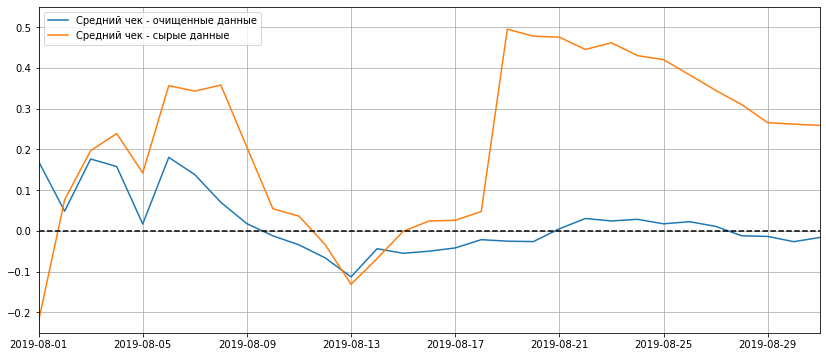

In [104]:
call_avg_rev_comparison_graph()

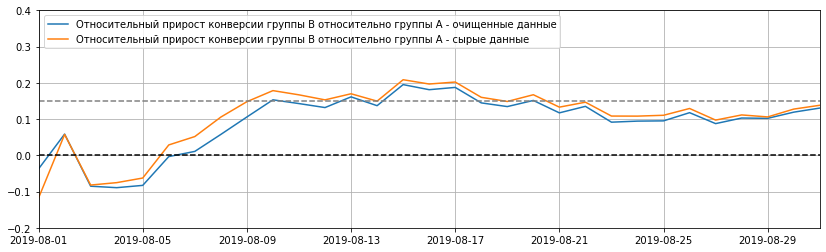

In [105]:
call_conversion_comparison_graph()